In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager,rc
# 한글 폰트
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

## 주요절차

### 1. 초기데이터 분석

In [3]:
file1 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202301.csv',encoding='cp949')
file2 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202302.csv',encoding='cp949')
file3 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202303.csv',encoding='cp949')
file4 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202304.csv',encoding='cp949')
file5 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202305.csv',encoding='cp949')
file6 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202306.csv',encoding='cp949')
file7 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202307.csv',encoding='cp949')
file8 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202308.csv',encoding='cp949')
file9 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202309.csv',encoding='cp949')
file10 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202310.csv',encoding='cp949')
file11 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202311.csv',encoding='cp949')
file12 = pd.read_csv('유성구_1인당 평균 소비 금액 데이터_202312.csv',encoding='cp949')

result = pd.concat([file1,file2,file3,file4,file5,file6,file7,file8,file9,file10,file11,file12])
result.head()

,기준년도,기준월,법정동코드,법정동명,표준산업대분류코드,표준산업대분류명,1인당 소비 금액
0,2023,1,30200126,가정동,C,제조업(10-34),33800
1,2023,1,30200126,가정동,G,도매 및 소매업(45-47),40200
2,2023,1,30200126,가정동,I,숙박 및 음식점업(55-56),21300
3,2023,1,30200126,가정동,P,교육 서비스업(85),74400
4,2023,1,30200126,가정동,Q,보건업 및 사회복지 서비스업(86-87),17800


#### 1-1. 데이터딕셔너리(각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼) 확인
#### 1-2 데이터 기초정보 확인 (사이즈, 열이름, 데이터형)

In [4]:
result.표준산업대분류명.value_counts()

표준산업대분류명
숙박 및 음식점업(55-56)                   605
도매 및 소매업(45-47)                    580
협회 및 단체  수리 및 기타 개인 서비스업(94-96)    552
교육 서비스업(85)                        550
예술  스포츠 및 여가관련 서비스업(90-91)         447
보건업 및 사회복지 서비스업(86-87)             404
공공 행정 국방 및 사회보장 행정(84)             358
전문  과학 및 기술 서비스업(70-73)            353
제조업(10-34)                         336
운수 및 창고업(49-52)                    287
건설업(41-42)                         170
사업시설 관리  사업 지원 및 임대 서비스업(74-76)    151
금융 및 보험업(64~66)                    107
부동산업(68)                            56
정보통신업(58-63)                        51
금융 및 보험업(64-66)                      7
Name: count, dtype: int64

In [5]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5014 entries, 0 to 446
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기준년도       5014 non-null   int64 
 1   기준월        5014 non-null   int64 
 2   법정동코드      5014 non-null   int64 
 3   법정동명       5014 non-null   object
 4   표준산업대분류코드  5014 non-null   object
 5   표준산업대분류명   5014 non-null   object
 6   1인당 소비 금액  5014 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 313.4+ KB


* 기초통계정보 확인

### 2. 데이터 정제

In [6]:
use_cols = ["기준월", "법정동명", "표준산업대분류명", "1인당 소비 금액"]
df = result[use_cols].copy()
df

,기준월,법정동명,표준산업대분류명,1인당 소비 금액
0,1,가정동,제조업(10-34),33800
1,1,가정동,도매 및 소매업(45-47),40200
2,1,가정동,숙박 및 음식점업(55-56),21300
3,1,가정동,교육 서비스업(85),74400
4,1,가정동,보건업 및 사회복지 서비스업(86-87),17800
...,...,...,...,...
442,12,화암동,숙박 및 음식점업(55-56),26900
443,12,화암동,공공 행정 국방 및 사회보장 행정(84),40800
444,12,화암동,교육 서비스업(85),445800
445,12,화암동,보건업 및 사회복지 서비스업(86-87),575500


In [10]:
def simplify_category(x):
    if x in ["제조업(10-34)", "건설업(41-42)"]:
        return "제조·건설업"
    elif x in ["숙박 및 음식점업(55-56)"]:
        return "숙박·음식업"
    elif x in ["도매 및 소매업(45-47)"]:
        return "도매·소매업"
    elif x in ["운수 및 창고업(49-52)"]:
        return "운수·창고업"
    elif x in ["금융 및 보험업(64-66)", "부동산업(68)"]:
        return "금융·부동산"
    elif x in ["교육 서비스업(85)", "보건업 및 사회복지 서비스업(86-87)", "공공 행정 국방 및 사회보장 행정(84)"]:
        return "공공·교육·보건"
    elif x in ["예술  스포츠 및 여가관련 서비스업(90-91)", "협회 및 단체  수리 및 기타 개인 서비스업(94-96)"]:
        return "예술·여가·개인서비스"
    else:
        return "기타"

df["산업분류"] = df["표준산업대분류명"].apply(simplify_category)
df

,기준월,법정동명,표준산업대분류명,1인당 소비 금액,산업분류
0,1,가정동,제조업(10-34),33800,제조·건설업
1,1,가정동,도매 및 소매업(45-47),40200,도매·소매업
2,1,가정동,숙박 및 음식점업(55-56),21300,숙박·음식업
3,1,가정동,교육 서비스업(85),74400,공공·교육·보건
4,1,가정동,보건업 및 사회복지 서비스업(86-87),17800,공공·교육·보건
...,...,...,...,...,...
442,12,화암동,숙박 및 음식점업(55-56),26900,숙박·음식업
443,12,화암동,공공 행정 국방 및 사회보장 행정(84),40800,공공·교육·보건
444,12,화암동,교육 서비스업(85),445800,공공·교육·보건
445,12,화암동,보건업 및 사회복지 서비스업(86-87),575500,공공·교육·보건


#### 2.1. 원본데이터에서 분석가능한 형태로 데이터 전처리 (형변환, 열이름 변경등)
#### 2.2. 데이터 클리닝: 이상치, 결측치처리

### 3. 추가데이터 분석

In [7]:
df['1인당 소비 금액'].sum()

np.int64(1015376900)

In [10]:
def simplify_category(x):
    if x in ["제조업(10-34)", "건설업(41-42)"]:
        return "제조·건설업"
    elif x in ["숙박 및 음식점업(55-56)"]:
        return "숙박·음식업"
    elif x in ["도매 및 소매업(45-47)"]:
        return "도매·소매업"
    elif x in ["운수 및 창고업(49-52)"]:
        return "운수·창고업"
    elif x in ["금융 및 보험업(64-66)", "부동산업(68)"]:
        return "금융·부동산"
    elif x in ["교육 서비스업(85)", "보건업 및 사회복지 서비스업(86-87)", "공공 행정 국방 및 사회보장 행정(84)"]:
        return "공공·교육·보건"
    elif x in ["예술  스포츠 및 여가관련 서비스업(90-91)", "협회 및 단체  수리 및 기타 개인 서비스업(94-96)"]:
        return "예술·여가·개인서비스"
    else:
        return "기타"

df["산업분류"] = df["표준산업대분류명"].apply(simplify_category)
df

,기준월,법정동명,표준산업대분류명,1인당 소비 금액,산업분류
0,1,가정동,제조업(10-34),33800,제조·건설업
1,1,가정동,도매 및 소매업(45-47),40200,도매·소매업
2,1,가정동,숙박 및 음식점업(55-56),21300,숙박·음식업
3,1,가정동,교육 서비스업(85),74400,공공·교육·보건
4,1,가정동,보건업 및 사회복지 서비스업(86-87),17800,공공·교육·보건
...,...,...,...,...,...
442,12,화암동,숙박 및 음식점업(55-56),26900,숙박·음식업
443,12,화암동,공공 행정 국방 및 사회보장 행정(84),40800,공공·교육·보건
444,12,화암동,교육 서비스업(85),445800,공공·교육·보건
445,12,화암동,보건업 및 사회복지 서비스업(86-87),575500,공공·교육·보건


In [46]:
df_group = df.groupby(['산업분류','기준월']).agg({
    '1인당 소비 금액':'sum',
}).reset_index()
df_group

,산업분류,기준월,1인당 소비 금액
0,공공·교육·보건,1,25456000
1,공공·교육·보건,2,24924500
2,공공·교육·보건,3,26941400
3,공공·교육·보건,4,26686200
4,공공·교육·보건,5,26925200
...,...,...,...
91,제조·건설업,8,22871700
92,제조·건설업,9,9442300
93,제조·건설업,10,20971500
94,제조·건설업,11,17799900


In [48]:
df_group2 = df.groupby(['기준월']).agg({
    '1인당 소비 금액':'sum',
}).reset_index()
df_group2

,기준월,1인당 소비 금액
0,1,81955400
1,2,77423100
2,3,88756500
3,4,71956400
4,5,76888400
5,6,83148800
6,7,78978300
7,8,96580300
8,9,88243900
9,10,85733800


In [19]:
def drop_outliers_zscore(df,column,threshold):
    z_scores =(df[column] - df[column].mean()) / df[column].std()
    df_drop_outliers = df[abs(z_scores) <= threshold]

    return df_drop_outliers

In [22]:
df_cleaned= drop_outliers_zscore(df, '1인당 소비 금액', 3)

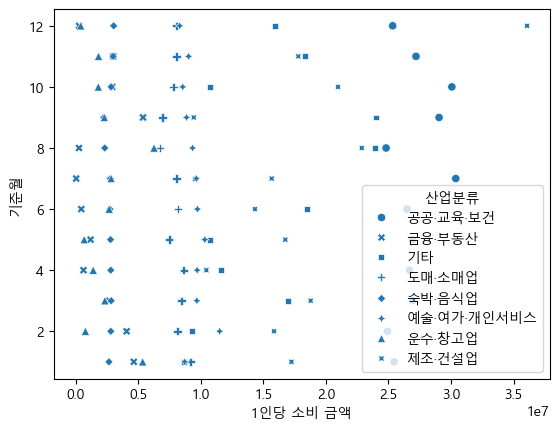

In [47]:
sns.scatterplot(data=df_group, x='1인당 소비 금액', y='기준월',style='산업분류')
plt.show()

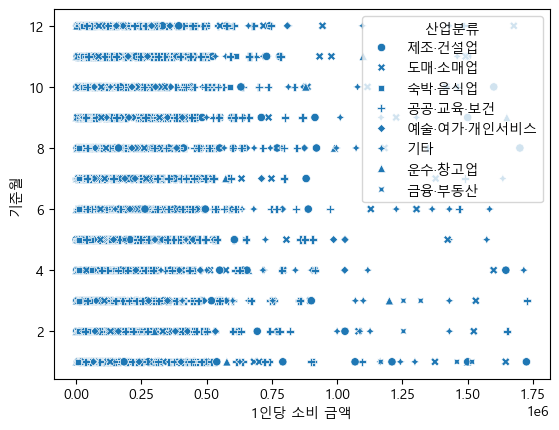

In [23]:
sns.scatterplot(data=df_cleaned, x='1인당 소비 금액', y='기준월',style='산업분류')
plt.show()

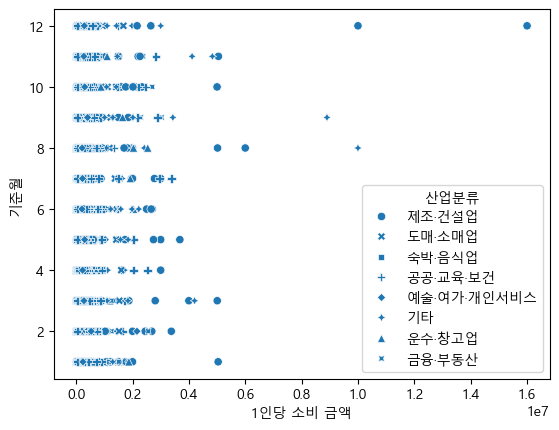

In [49]:
sns.scatterplot(data=df, x='1인당 소비 금액', y='기준월',style='산업분류')
plt.show()

#### 3.1 데이터 정제후 데이터딕셔너리 재확인
#### 3.2 기초통계 정보 확인 (최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값 등)
#### 3.3 시각화를 통한 데이터이해 심화 

* 3.3.1 단일 열: 데이터의 성격에 따른 다양한 차트 적용  
* 3.3.2 복수 열: 두개의 열간 연관관계 분석(Pair Plot 또는 Seaborn의 관련 지원 차트등)

#### 3.4 데이터 분석 결과도출

# 데이터분석 적용 실습 템플릿

## 데이터 수집

In [1]:
# 데이터 소스를 확보하세요


## 1. 초기데이터 분석

### 1-1. 데이터스키마 확인

#### 각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼을 확인 가능시 진행 하세요
* A열: A열의 의미를 기술
* B열: B열의 의미를 기술  
...

### 1-2. 데이터 기초정보 확인

* 사이즈, 데이터형, 기초통계항목등을 확인하세요  

In [ ]:
#df.shape
#df.info()

* 기초통계항목

In [ ]:
# df.desribe()

## 2. 데이터 정제

### 2-1. 간단한 데이터 전처리

In [5]:
# 원본데이터로에서 읽기 가능한 형태로 데이터처리를 하세요. (열이름 변경, 형변환 등)

### 2-2. 데이터 클리닝

In [6]:
# 결측치, 중복값, 이상치 처리등의 작업을 진행하세요

* 결측치

    - 결측치 열 확인

In [ ]:
# missing_values = df.isnull().any()  
# column_missing_values = missing_values[ missing_values == True ]
# column_missing_values

In [ ]:
# df.isnull().any(axis=1)

* 결측치 보정

In [ ]:
# df['나이'] = df['나이'].fillna(0)

In [1]:
# df = df.fillna(0)

* 중복값 삭제 (필요시)

In [ ]:
# df[df.duplicated(keep=False)]

In [ ]:
# df.drop_duplicates(inplace=True)

## 3. 추가데이터 분석

### 3.1. 데이터 정제후 데이터스키마 재확인

* 1-2 작업을 다시 해보세요.

### 3.2 데이터 기초정보 정보 확인

* 최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값, 결측치, 이상치 등의 정보를 재확인해 보세요

### 3.3 시각화를 통한 데이터이해 심화

* 데이터의 성격에 따라 이해도를 올리기 위해 시각화가 필요한 데이터차트를 만들어 보세요.  
    * (Seaborn 추천: 페어플롯, 막대차트, 파이차트, 라인차트, 히스토그램등..)
    * 차트 분석시 hue인자를 활용해서 범주형 열에 대한 추가 분석을 해보세요.
* 시각화한 차트에 대한 분석

### 3.4 최종 데이터 분석 결과도출

* 데이터 분석을 통해 얻은 새로운 지식, 인사이트를 정리하세요.
* 새로운 지식 및 인사이트 별 비지니스 전략을 도출할 수 있으면 정리해 보세요